In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pickle

# Load Anndata
with open('10x_visium_dataset_without_window.pickle', 'rb') as f:
    adata_dict0 = pickle.load(f)

# Split the train and test samples
samps1 = ["CID4290", "CID4465", "CID44971", "CID4535", "1160920F", "1142243F",]
samps2 = ["block1", "block2", "FFPE"]

In [3]:
import gc
gc.collect()

0

In [5]:
# Compute the quality control metrics for train and test gene expression
df_all=[]
for key in samps1:
    adata = adata_dict0[key]
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    df = pd.DataFrame(adata.obs["n_genes_by_counts"])
    df['Slide'] = key
    df_all.append(df)
df_train = pd.concat(df_all)

df_all=[]
for key in samps2:
    adata = adata_dict0[key]
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    df = pd.DataFrame(adata.obs["n_genes_by_counts"])
    df['Slide'] = key
    df_all.append(df)
df_test = pd.concat(df_all)

df_train["Kind"]="Training dataset"
df_test["Kind"]="Test dataset"
df_all = pd.concat([df_train, df_test])
df_all


/scratch/imb/uqyjia11/.conda/envs/pt3.8/lib/python3.8/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/scratch/imb/uqyjia11/.conda/envs/pt3.8/lib/python3.8/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/scratch/imb/uqyjia11/.conda/envs/pt3.8/lib/python3.8/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/scratch/imb/uqyjia11/.conda/envs/pt3.8/lib/python3.8/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/scr

,n_genes_by_counts,Slide,Kind
AAACAAGTATCTCCCA-1,6899,CID4290,Training dataset
AAACAATCTACTAGCA-1,387,CID4290,Training dataset
AAACAGAGCGACTCCT-1,5366,CID4290,Training dataset
AAACATTTCCCGGATT-1,3683,CID4290,Training dataset
AAACCACTACACAGAT-1,99,CID4290,Training dataset
...,...,...,...
TTGTTCAGTGTGCTAC-1,4077,FFPE,Test dataset
TTGTTGTGTGTCAAGA-1,5635,FFPE,Test dataset
TTGTTTCACATCCAGG-1,1912,FFPE,Test dataset
TTGTTTCATTAGTCTA-1,3892,FFPE,Test dataset


In [9]:
df_all.columns = ["Number of genes", "Slide", "Kind"]
df_all

,Number of genes,Slide,Kind
AAACAAGTATCTCCCA-1,6899,CID4290,Training dataset
AAACAATCTACTAGCA-1,387,CID4290,Training dataset
AAACAGAGCGACTCCT-1,5366,CID4290,Training dataset
AAACATTTCCCGGATT-1,3683,CID4290,Training dataset
AAACCACTACACAGAT-1,99,CID4290,Training dataset
...,...,...,...
TTGTTCAGTGTGCTAC-1,4077,FFPE,Test dataset
TTGTTGTGTGTCAAGA-1,5635,FFPE,Test dataset
TTGTTTCACATCCAGG-1,1912,FFPE,Test dataset
TTGTTTCATTAGTCTA-1,3892,FFPE,Test dataset


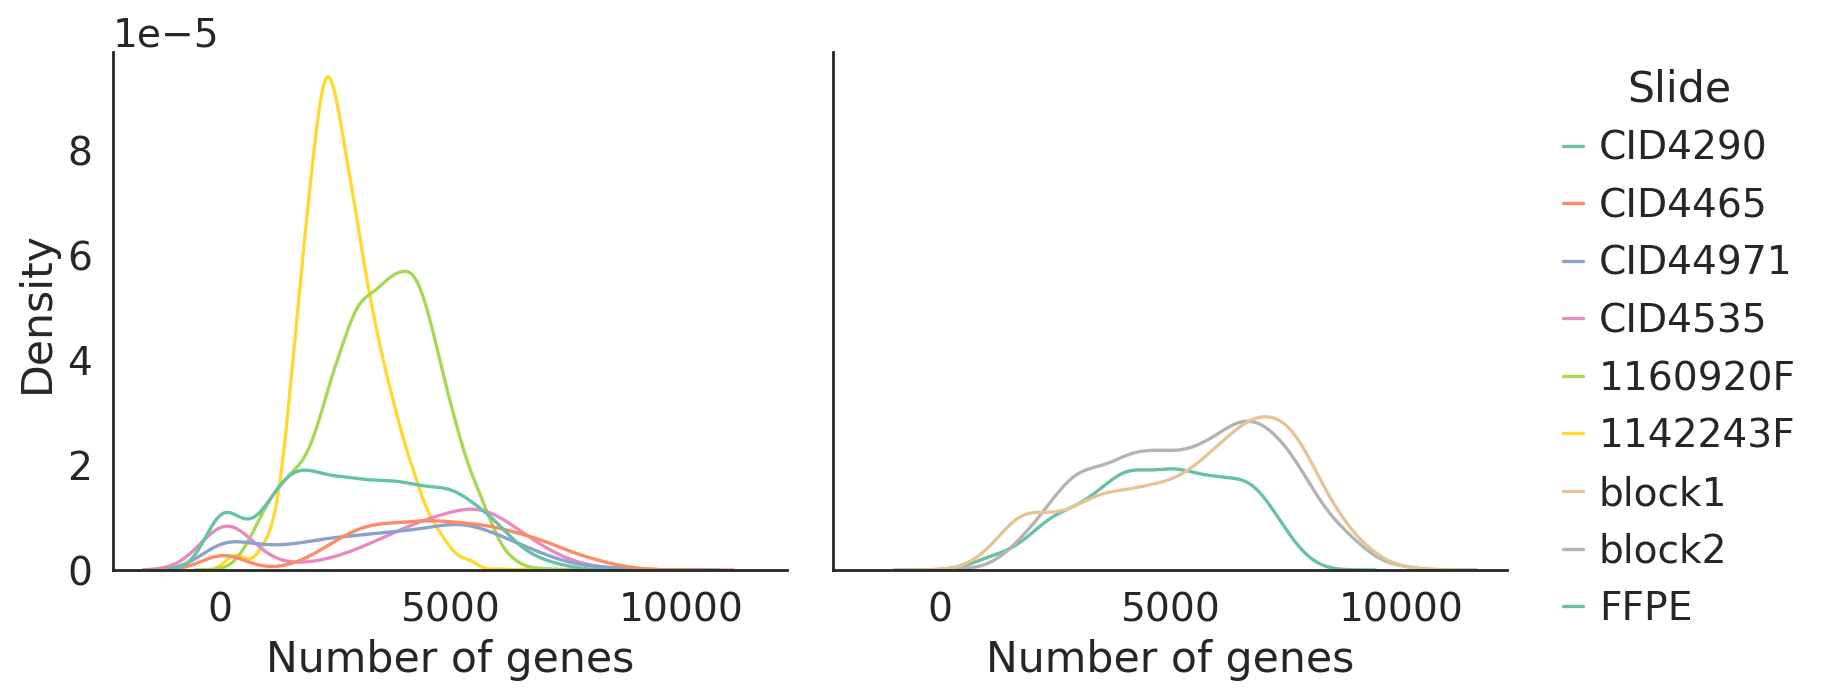

In [11]:
import gc
gc.collect()
sns.set(font_scale=1.6)
sns.set_style("white")

g = sns.displot(df_all, x="Number of genes", hue="Slide", col="Kind", kind="kde", palette="Set2").set_titles(col_template="")
plt.savefig("")
# plt.title("Gene expression distribution")
plt.show()


# Color Distribution of Visium dataset

In [7]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import ImageFile, Image
from torchvision import transforms as transforms
from skimage import color

ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.MAX_IMAGE_PIXELS = None

In [8]:
tr_img_path_list = [
'/scratch/imb/uqyjia11/Yuanhao/10X_visium/Alex_NatGen_6BreastCancer/1142243F/image.tif',
'/scratch/imb/uqyjia11/Yuanhao/10X_visium/Alex_NatGen_6BreastCancer/1160920F/image.tif',
 '/scratch/imb/uqyjia11/Yuanhao/10X_visium/Alex_NatGen_6BreastCancer/CID4290/image.tif',
 '/scratch/imb/uqyjia11/Yuanhao/10X_visium/Alex_NatGen_6BreastCancer/CID4465/image.tif',
 '/scratch/imb/uqyjia11/Yuanhao/10X_visium/Alex_NatGen_6BreastCancer/CID44971/image.tif',
 '/scratch/imb/uqyjia11/Yuanhao/10X_visium/Alex_NatGen_6BreastCancer/CID4535/image.tif',
 ]

image_paths = tr_img_path_list 
images = [np.array(Image.open(path))for path in image_paths]
resize_img = [cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA) for img in images]
del images

# # Convert images to RGB color space
images_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in resize_img]

# Extract color channel values
data = []
for i, image_rgb in enumerate(images_rgb):
    for channel in range(3):
        channel_name = ['Red', 'Green', 'Blue'][channel]
        data.extend([(channel_name, image_paths[i], pixel) for pixel in image_rgb[:, :, channel].flatten()])

# Create a DataFrame for Seaborn
df = pd.DataFrame(data, columns=['Channel', 'Slides', 'Pixel'])
df = df.replace('/scratch/imb/uqyjia11/Yuanhao/10X_visium/Alex_NatGen_6BreastCancer/1142243F/image.tif', '1142243F')
df = df.replace('/scratch/imb/uqyjia11/Yuanhao/10X_visium/Alex_NatGen_6BreastCancer/CID4290/image.tif', 'CID4290')
df = df.replace('/scratch/imb/uqyjia11/Yuanhao/10X_visium/Alex_NatGen_6BreastCancer/CID44971/image.tif', 'CID44971')
df = df.replace('/scratch/imb/uqyjia11/Yuanhao/10X_visium/Alex_NatGen_6BreastCancer/CID4535/image.tif', 'CID4535')
df = df.replace('/scratch/imb/uqyjia11/Yuanhao/10X_visium/Alex_NatGen_6BreastCancer/CID4465/image.tif', 'CID4465')
df = df.replace('/scratch/imb/uqyjia11/Yuanhao/10X_visium/Alex_NatGen_6BreastCancer/1160920F/image.tif', '1160920F')
df_tr = df

In [9]:
te_img_path_list = [
'/scratch/imb/uqyjia11/Yuanhao/10X_visium/breast_cancer_10x_visium/block1/image.tif',
 '/scratch/imb/uqyjia11/Yuanhao/10X_visium/breast_cancer_10x_visium/block2/image.tif',
 '/scratch/imb/uqyjia11/Yuanhao/10X_visium/breast_cancer_10x_visium/FFPE/image.tif']

image_paths = te_img_path_list 
images = [np.array(Image.open(path))for path in image_paths]
resize_img = [cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA) for img in images]
del images

# # Convert images to RGB color space
images_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in resize_img]

# Extract color channel values
data = []
for i, image_rgb in enumerate(images_rgb):
    for channel in range(3):
        channel_name = ['Red', 'Green', 'Blue'][channel]
        data.extend([(channel_name, image_paths[i], pixel) for pixel in image_rgb[:, :, channel].flatten()])

# Create a DataFrame for Seaborn
df = pd.DataFrame(data, columns=['Channel', 'Slides', 'Pixel'])

df = df.replace('/scratch/imb/uqyjia11/Yuanhao/10X_visium/breast_cancer_10x_visium/block1/image.tif', 'block1')
df = df.replace('/scratch/imb/uqyjia11/Yuanhao/10X_visium/breast_cancer_10x_visium/block2/image.tif', 'block2')
df = df.replace('/scratch/imb/uqyjia11/Yuanhao/10X_visium/breast_cancer_10x_visium/FFPE/image.tif', 'FFPE')
df_te = df

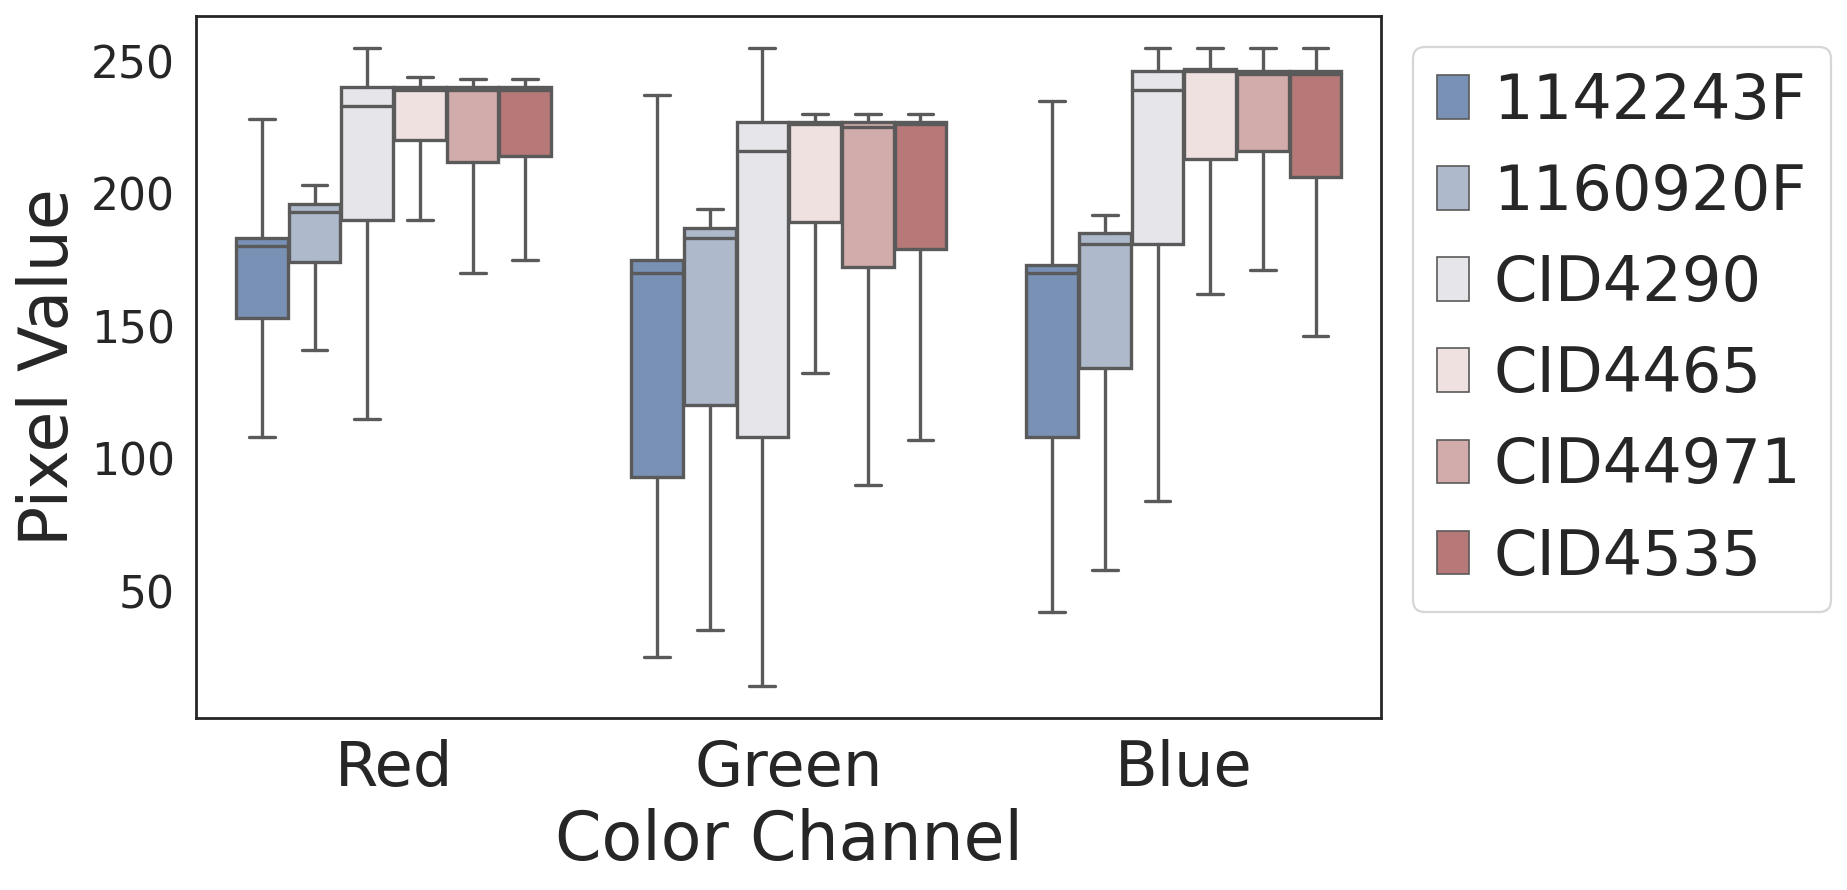

In [26]:
# Create a single plot with Seaborn
plt.figure(figsize=(12, 6))
# sns.set(font_scale=1.8)
sns.set_style("white")
sns.boxplot(data=df_tr, x='Channel', y='Pixel', hue='Slides', showfliers=False, palette ="vlag")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=28)
# plt.title('Distribution of Colors in the Test Set Slides')
plt.ylabel('Pixel Value', fontsize=30)
plt.xlabel('Color Channel', fontsize=30)
plt.xticks([0, 1, 2], ['Red', 'Green', 'Blue'], fontsize=28)

plt.tight_layout()
plt.show()

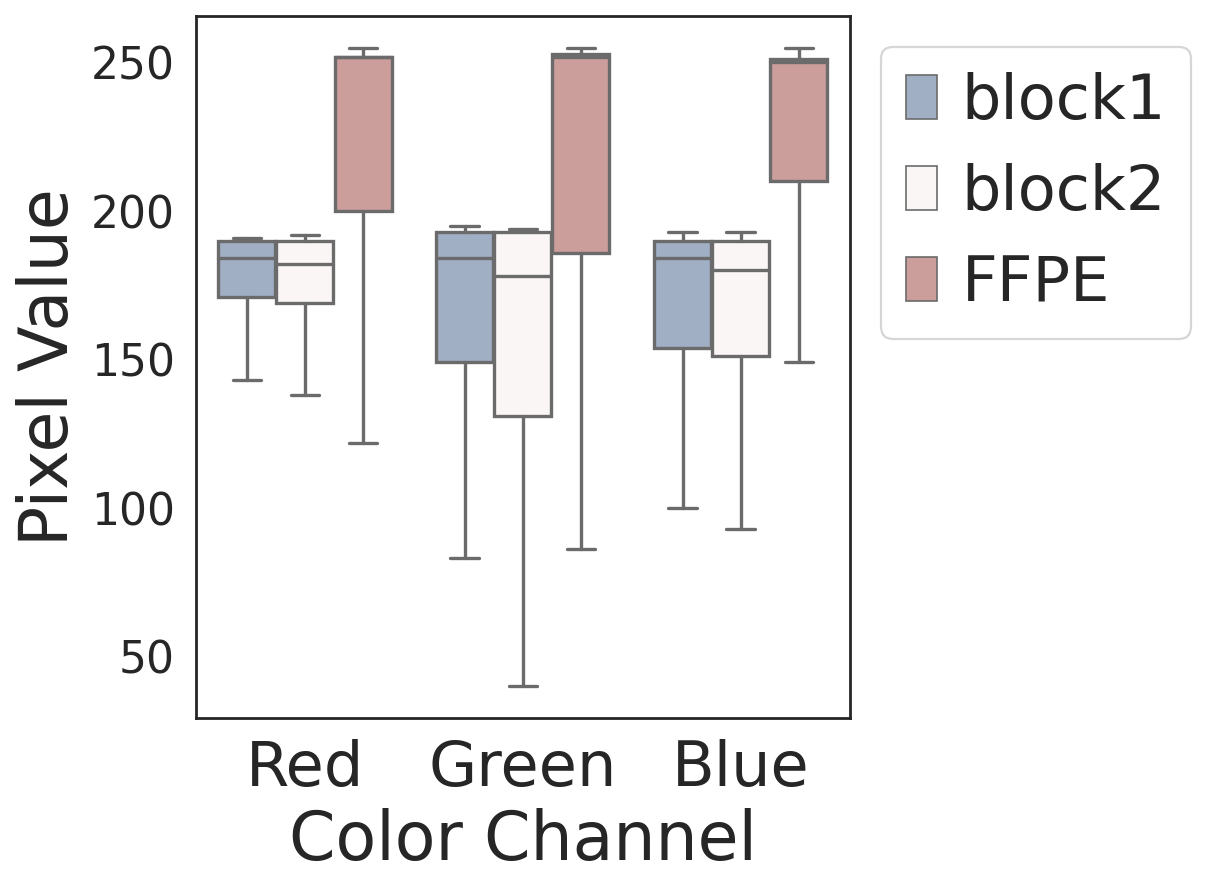

In [25]:
# Create a single plot with Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.boxplot(data=df_te, x='Channel', y='Pixel', hue='Slides', showfliers=False, palette ="vlag")
# sns.set(font_scale=1.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=28)
# plt.title('Distribution of Colors in the Test Set Slides')
plt.ylabel('Pixel Value', fontsize=30)
plt.xlabel('Color Channel', fontsize=30)
plt.xticks([0, 1, 2], ['Red', 'Green', 'Blue'], fontsize=28)

plt.tight_layout()
plt.show()